In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset
df = pd.read_csv("Loan payments data.csv")

## Exploratory Data Analysis (EDA)

In [3]:
# Display first five rows of the dataset
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
# Summary statistics of the numerical columns
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [5]:
# View number of missing values
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [6]:
df["past_due_days"] = df["past_due_days"].fillna(0).astype(int)

In [7]:
# drop rows with null values
df = df.dropna(axis=0)

In [8]:
# View number of missing values
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [9]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female


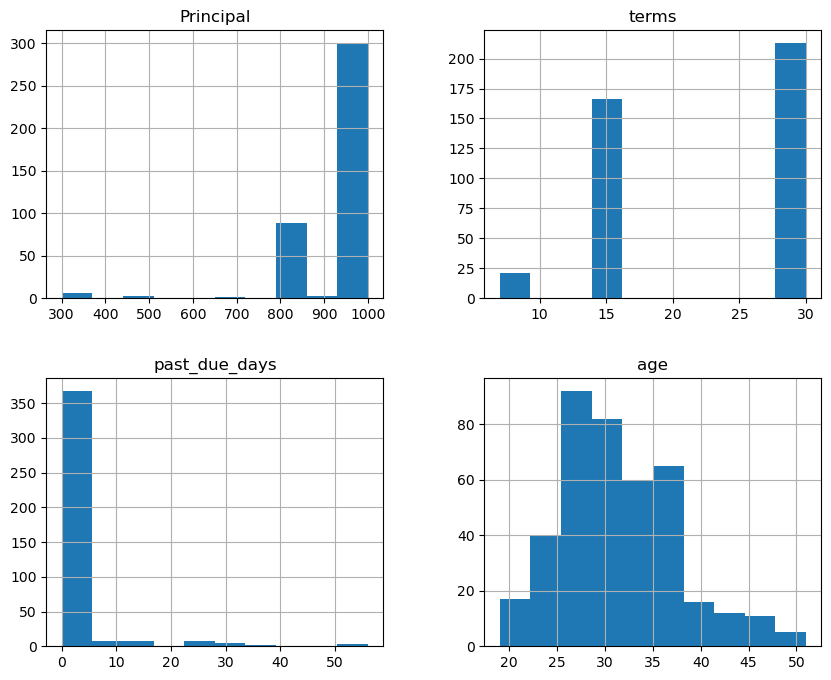

In [10]:
# Plot histograms of the numerical variables
df.hist(figsize=(10,8))

plt.show()

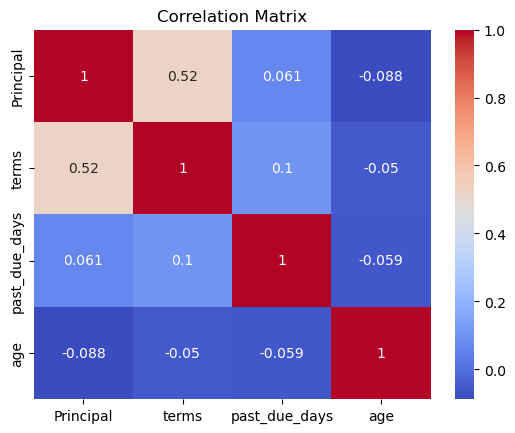

In [11]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [12]:
df["effective_date"] = pd.to_datetime(df["effective_date"])
df["due_date"] = pd.to_datetime(df["due_date"])
df["paid_off_time"] = pd.to_datetime(df["paid_off_time"], errors="coerce")
df["past_due_days"] = df["past_due_days"].fillna(0).astype(int)
df["loan_duration"] = (df["due_date"] - df["effective_date"]).dt.days
df["paid_off"] = df["loan_status"].apply(lambda x: 1 if x == "PAIDOFF" else 0)

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), ["education", "Gender"])], remainder="passthrough")
X = ct.fit_transform(df.drop(columns=["Loan_ID", "loan_status", "effective_date", "due_date", "paid_off_time", "loan_status"]))
y = df["paid_off"].values

In [13]:
X

array([[ 0.,  1.,  0., ..., 45., 29.,  1.],
       [ 1.,  0.,  0., ..., 50., 29.,  1.],
       [ 1.,  0.,  0., ..., 33., 29.,  1.],
       ...,
       [ 0.,  0.,  0., ..., 30., 14.,  0.],
       [ 0.,  0.,  0., ..., 38., 59.,  0.],
       [ 0.,  1.,  0., ..., 28., 29.,  0.]])

In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Model Development

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

# instantiate the scaler
scaler = StandardScaler()

# fit and transform X_train
X_train = scaler.fit_transform(X_train)

# transform X_test using the same scaler
X_test = scaler.transform(X_test)

In [21]:
## Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_conmat = confusion_matrix(y_test, svc_pred)

In [22]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_conmat = confusion_matrix(y_test, rf_pred)

## Model Evaluation

In [23]:
print("SVC accuracy:", svc_acc)
print("SVC F1 Score:", svc_f1)
print("SVC Confusion Matrix:\n", svc_conmat)

SVC accuracy: 1.0
SVC F1 Score: 1.0
SVC Confusion Matrix:
 [[18  0]
 [ 0 62]]


In [24]:
print("Random Forest accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Confusion Matrix:\n", rf_conmat)

Random Forest accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Confusion Matrix:
 [[18  0]
 [ 0 62]]
